시퀀스 배열로 다루는 순환 신경망(RNN)

1. LSTM을 이용한 로이터 뉴스 카테고리 분류

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눔
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 단어의 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [6]:
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
# 모델 실행 옵션
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 47s 99ms/step - loss: 2.1588 - accuracy: 0.4557 - val_loss: 1.8565 - val_accuracy: 0.5191
Epoch 2/200
450/450 [==============================] - 40s 89ms/step - loss: 1.7736 - accuracy: 0.5355 - val_loss: 1.7097 - val_accuracy: 0.5472
Epoch 3/200
450/450 [==============================] - 41s 90ms/step - loss: 1.6391 - accuracy: 0.5823 - val_loss: 1.5826 - val_accuracy: 0.6055
Epoch 4/200
450/450 [==============================] - 42s 94ms/step - loss: 1.4688 - accuracy: 0.6287 - val_loss: 1.4812 - val_accuracy: 0.6291
Epoch 5/200
450/450 [==============================] - 40s 89ms/step - loss: 1.3310 - accuracy: 0.6649 - val_loss: 1.3639 - val_accuracy: 0.6647
Epoch 6/200
450/450 [==============================] - 40s 88ms/step - loss: 1.2237 - accuracy: 0.6884 - val_loss: 1.3209 - val_accuracy: 0.6616
Epoch 7/200
450/450 [==============================] - 39s 87ms/step - loss: 1.1309 - accuracy: 0.7134 - val_loss: 1.2541 - val_ac

In [9]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 25ms/step - loss: 1.3023 - accuracy: 0.7360

 Test Accuracy: 0.7360


In [10]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

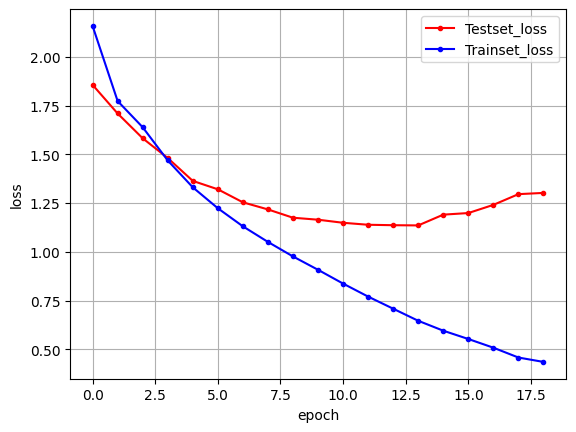

In [13]:
# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

2. LSTM과 CNN 조합을 이용한 영화 리뷰 분류

In [16]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 데이터를 불러와 학습셋, 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [18]:
# 단어 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [19]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [20]:
# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 125s 257ms/step - loss: 0.3995 - accuracy: 0.8073 - val_loss: 0.3176 - val_accuracy: 0.8766
Epoch 2/100
469/469 [==============================] - 116s 248ms/step - loss: 0.2351 - accuracy: 0.9105 - val_loss: 0.2797 - val_accuracy: 0.8888
Epoch 3/100
469/469 [==============================] - 113s 242ms/step - loss: 0.1882 - accuracy: 0.9275 - val_loss: 0.2678 - val_accuracy: 0.8888
Epoch 4/100
469/469 [==============================] - 117s 249ms/step - loss: 0.1484 - accuracy: 0.9463 - val_loss: 0.2821 - val_accuracy: 0.8898
Epoch 5/100
469/469 [==============================] - 118s 251ms/step - loss: 0.1188 - accuracy: 0.9576 - val_loss: 0.3070 - val_accuracy: 0.8853
Epoch 6/100
469/469 [==============================] - 118s 252ms/step - loss: 0.0990 - accuracy: 0.9651 - val_loss: 0.3353 - val_accuracy: 0.8826


In [23]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 32s 41ms/step - loss: 0.3612 - accuracy: 0.8728

 Test Accuracy: 0.8728


In [24]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

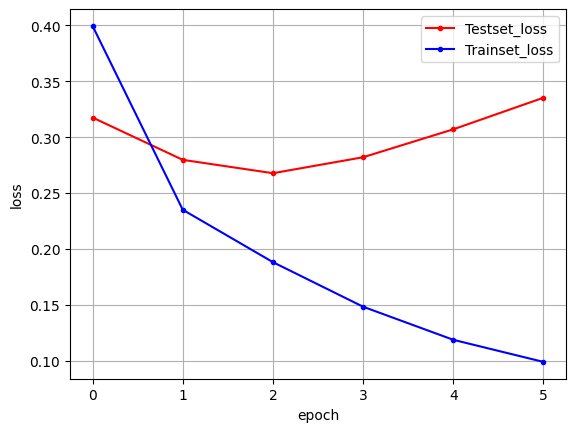

In [25]:
# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()